In [58]:
from sklearn.linear_model import LinearRegression

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [59]:
ACT = pd.read_csv('ACT_all_years_long.csv')
SATn = pd.read_csv('SAT_NEW_long.csv')
SATo = pd.read_csv('SAT_OLD_long.csv')
spending = pd.read_csv('spending.csv')

In [60]:
print(SATo)

             State  Year  Subject  Score
0          Alabama  2012    Total   1608
1           Alaska  2012    Total   1495
2          Arizona  2012    Total   1551
3         Arkansas  2012    Total   1697
4       California  2012    Total   1505
..             ...   ...      ...    ...
811       Virginia  2015  Writing    498
812     Washington  2015  Writing    481
813  West Virginia  2015  Writing    502
814      Wisconsin  2015  Writing    588
815        Wyoming  2015  Writing    587

[816 rows x 4 columns]


### Showing again the change in spending for the duration of years

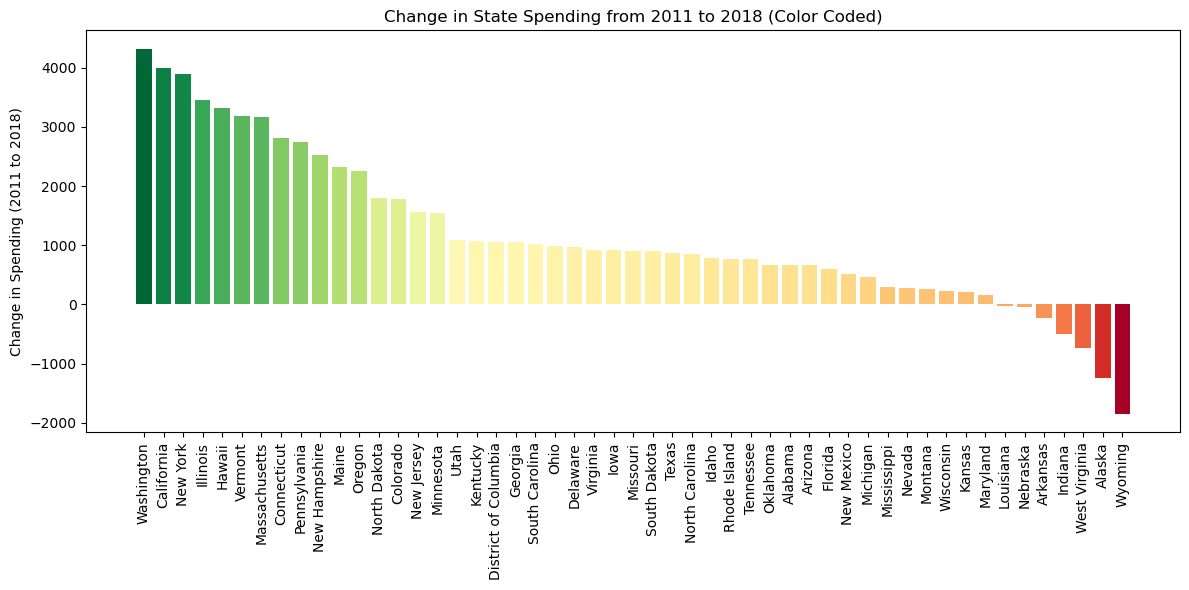

In [61]:
spending = spending.set_index('State')

year_columns = [col for col in spending.columns if str(col).isdigit()]
first_year = str(min(map(int, year_columns)))
last_year = str(max(map(int, year_columns)))

spending['Change'] = spending[last_year] - spending[first_year]

diff_table_sorted = spending[['Change']].sort_values('Change', ascending=False)

changes = diff_table_sorted['Change']
norm = mcolors.Normalize(vmin=changes.min(), vmax=changes.max())
colors = cm.RdYlGn(norm(changes))

plt.figure(figsize=(12, 6))
plt.bar(diff_table_sorted.index, changes, color=colors)
plt.xticks(rotation=90)
plt.ylabel(f'Change in Spending ({first_year} to {last_year})')
plt.title(f'Change in State Spending from {first_year} to {last_year} (Color Coded)')
plt.tight_layout()
plt.show()

state_colors = dict(zip(diff_table_sorted.index, colors))

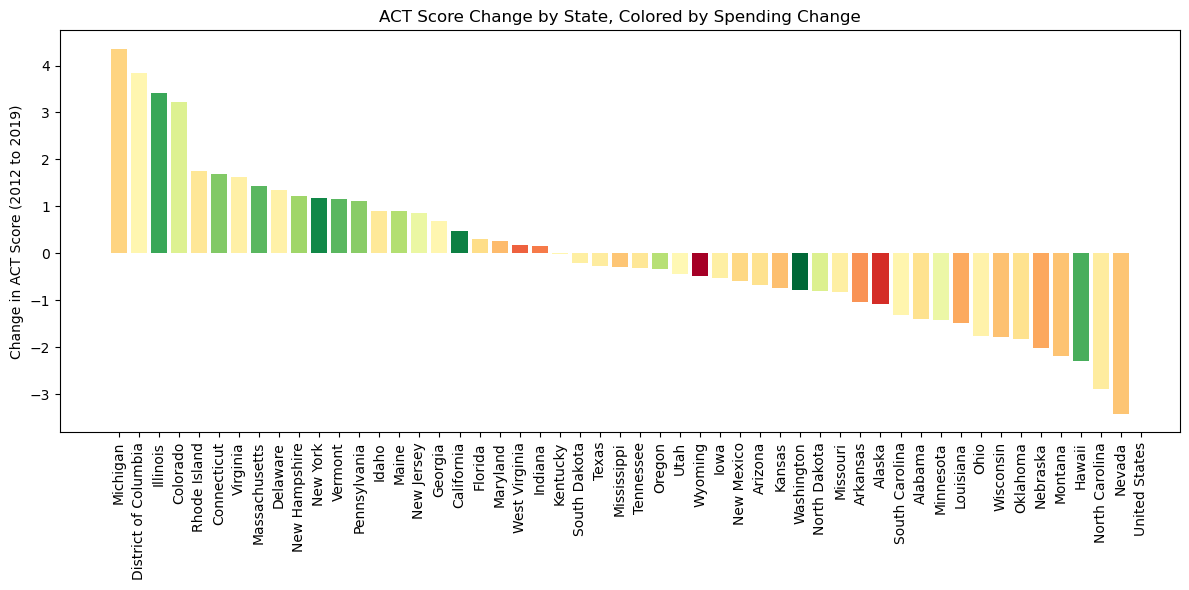

In [62]:
ACT_cleaned = ACT.groupby(['State', 'Year'], as_index=False)['Score'].mean()
ACT_pivot = ACT_cleaned.pivot(index='State', columns='Year', values='Score')

first_year = ACT_pivot.columns.min()  #First year
last_year = ACT_pivot.columns.max()  #Last year
ACT_pivot['Score Change'] = ACT_pivot[last_year] - ACT_pivot[first_year]  #average change
act_diff_sorted = ACT_pivot[['Score Change']].sort_values('Score Change', ascending=False)

act_colors = [state_colors.get(state, 'black') for state in act_diff_sorted.index]

plt.figure(figsize=(12, 6))
plt.bar(act_diff_sorted.index, act_diff_sorted['Score Change'], color=act_colors)
plt.xticks(rotation=90)
plt.ylabel(f'Change in ACT Score ({first_year} to {last_year})')
plt.title(f'ACT Score Change by State, Colored by Spending Change')
plt.tight_layout()
plt.show()

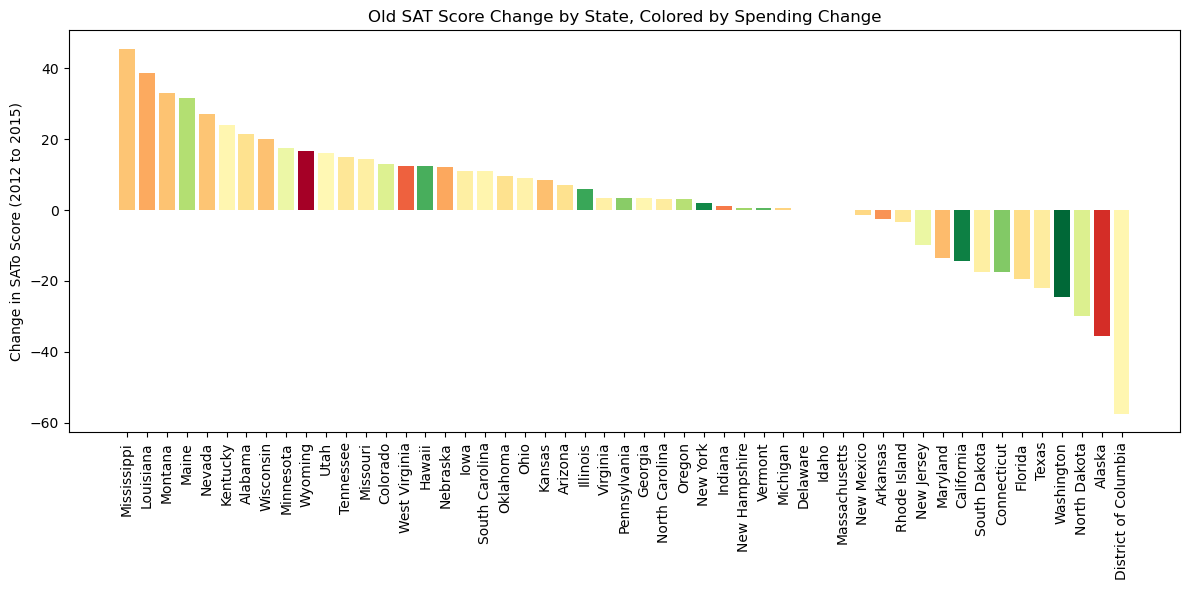

In [63]:
SATo_cleaned = SATo.groupby(['State', 'Year'], as_index=False)['Score'].mean()
SATo_pivot = SATo_cleaned.pivot(index='State', columns='Year', values='Score')

first_year = SATo_pivot.columns.min()
last_year = SATo_pivot.columns.max()
SATo_pivot['Score Change'] = SATo_pivot[last_year] - SATo_pivot[first_year]
sato_diff_sorted = SATo_pivot[['Score Change']].sort_values('Score Change', ascending=False)

sato_colors = [state_colors.get(state, 'black') for state in sato_diff_sorted.index]

plt.figure(figsize=(12, 6))
plt.bar(sato_diff_sorted.index, sato_diff_sorted['Score Change'], color=sato_colors)
plt.xticks(rotation=90)
plt.ylabel(f'Change in SATo Score ({first_year} to {last_year})')
plt.title(f'Old SAT Score Change by State, Colored by Spending Change')
plt.tight_layout()
plt.show()

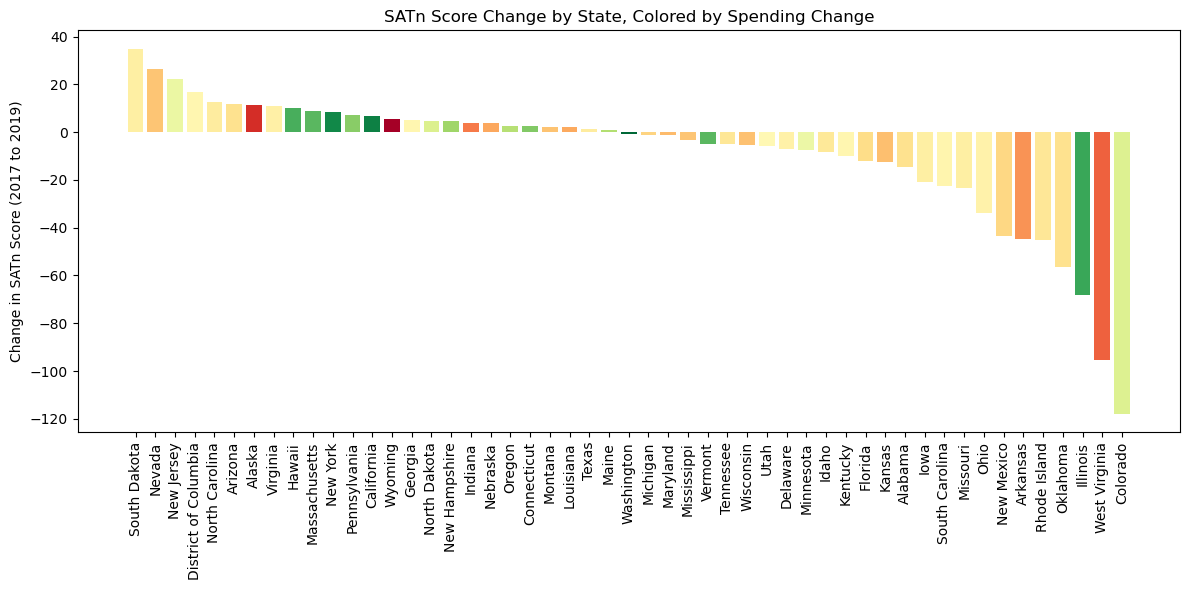

In [64]:
SATn_cleaned = SATn.groupby(['State', 'Year'], as_index=False)['Score'].mean()
SATn_pivot = SATn_cleaned.pivot(index='State', columns='Year', values='Score')

first_year = SATn_pivot.columns.min()
last_year = SATn_pivot.columns.max()
SATn_pivot['Score Change'] = SATn_pivot[last_year] - SATn_pivot[first_year]
satn_diff_sorted = SATn_pivot[['Score Change']].sort_values('Score Change', ascending=False)

satn_colors = [state_colors.get(state, 'black') for state in satn_diff_sorted.index]

plt.figure(figsize=(12, 6))
plt.bar(satn_diff_sorted.index, satn_diff_sorted['Score Change'], color=satn_colors)
plt.xticks(rotation=90)
plt.ylabel(f'Change in SATn Score ({first_year} to {last_year})')
plt.title(f'SATn Score Change by State, Colored by Spending Change')
plt.tight_layout()
plt.show()


## And here are the plots in terms of actual dollar amounts spent:

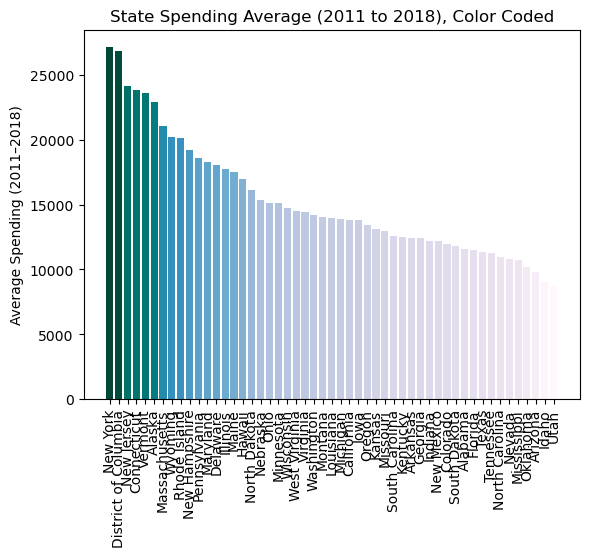

In [79]:
state_avg = spending.loc[:, '2011':'2018'].mean(axis=1)

state_avg_table = pd.DataFrame({'2011-2018 Average': state_avg})

state_avg_sorted = state_avg_table.sort_values('2011-2018 Average', ascending=False)

avg_values = state_avg_sorted['2011-2018 Average']
norm = plt.Normalize(avg_values.min(), avg_values.max())
colors = cm.PuBuGn(norm(avg_values))  # green = high average, red = low average

plt.bar(state_avg_sorted.index, avg_values, color=colors)
plt.xticks(rotation=90)
plt.ylabel('Average Spending (2011–2018)')
plt.title('State Spending Average (2011 to 2018), Color Coded')
plt.show()

state_colors = dict(zip(state_avg_sorted.index, colors))

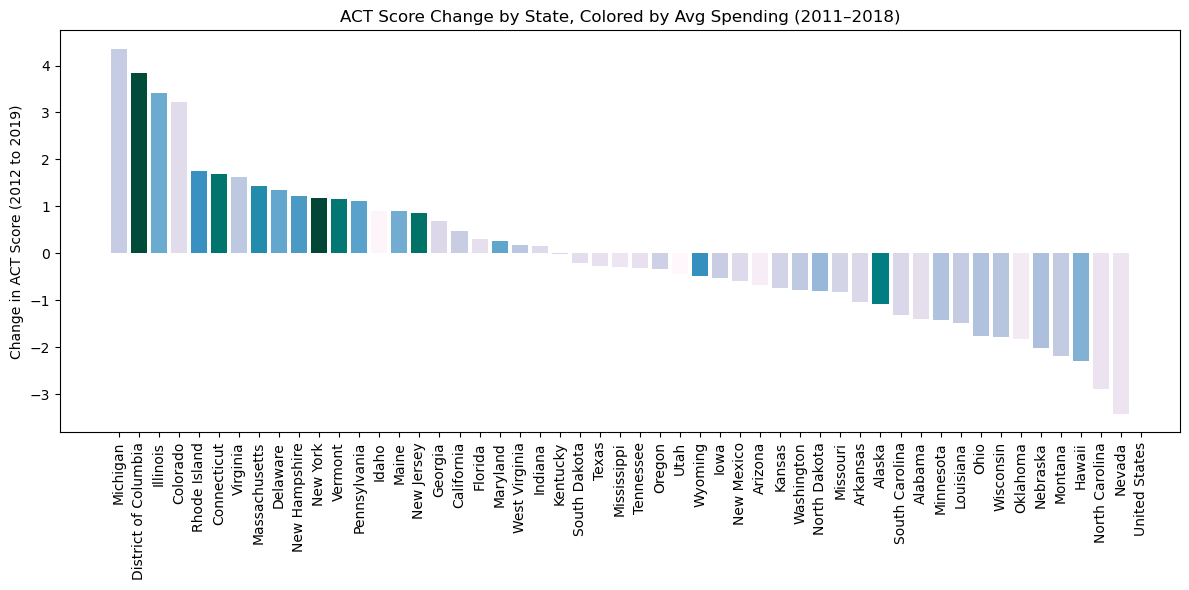

In [66]:
ACT_cleaned = ACT.groupby(['State', 'Year'], as_index=False)['Score'].mean()
ACT_pivot = ACT_cleaned.pivot(index='State', columns='Year', values='Score')

first_year = ACT_pivot.columns.min()
last_year = ACT_pivot.columns.max()
ACT_pivot['Score Change'] = ACT_pivot[last_year] - ACT_pivot[first_year]

act_diff_sorted = ACT_pivot[['Score Change']].sort_values('Score Change', ascending=False)

act_colors = [state_colors.get(state, 'black') for state in act_diff_sorted.index]

plt.figure(figsize=(12, 6))
plt.bar(act_diff_sorted.index, act_diff_sorted['Score Change'], color=act_colors)
plt.xticks(rotation=90)
plt.ylabel(f'Change in ACT Score ({first_year} to {last_year})')
plt.title(f'ACT Score Change by State, Colored by Avg Spending (2011–2018)')
plt.tight_layout()
plt.show()

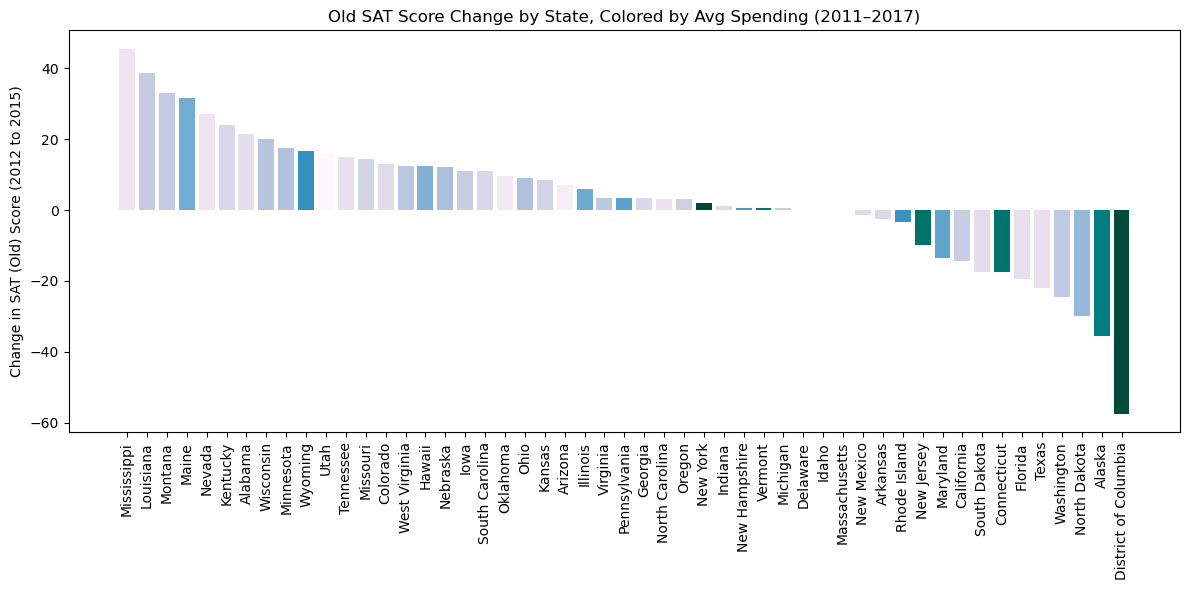

In [78]:
SATo_cleaned = SATo.groupby(['State', 'Year'], as_index=False)['Score'].mean()
SATo_pivot = SATo_cleaned.pivot(index='State', columns='Year', values='Score')

first_year = SATo_pivot.columns.min()
last_year = SATo_pivot.columns.max()
SATo_pivot['Score Change'] = SATo_pivot[last_year] - SATo_pivot[first_year]

sato_diff_sorted = SATo_pivot[['Score Change']].sort_values('Score Change', ascending=False)

sato_colors = [state_colors.get(state, 'black') for state in sato_diff_sorted.index]

plt.figure(figsize=(12, 6))
plt.bar(sato_diff_sorted.index, sato_diff_sorted['Score Change'], color=sato_colors)
plt.xticks(rotation=90)
plt.ylabel(f'Change in SAT (Old) Score ({first_year} to {last_year})')
plt.title(f'Old SAT Score Change by State, Colored by Avg Spending (2011–2017)')
plt.tight_layout()
plt.show()

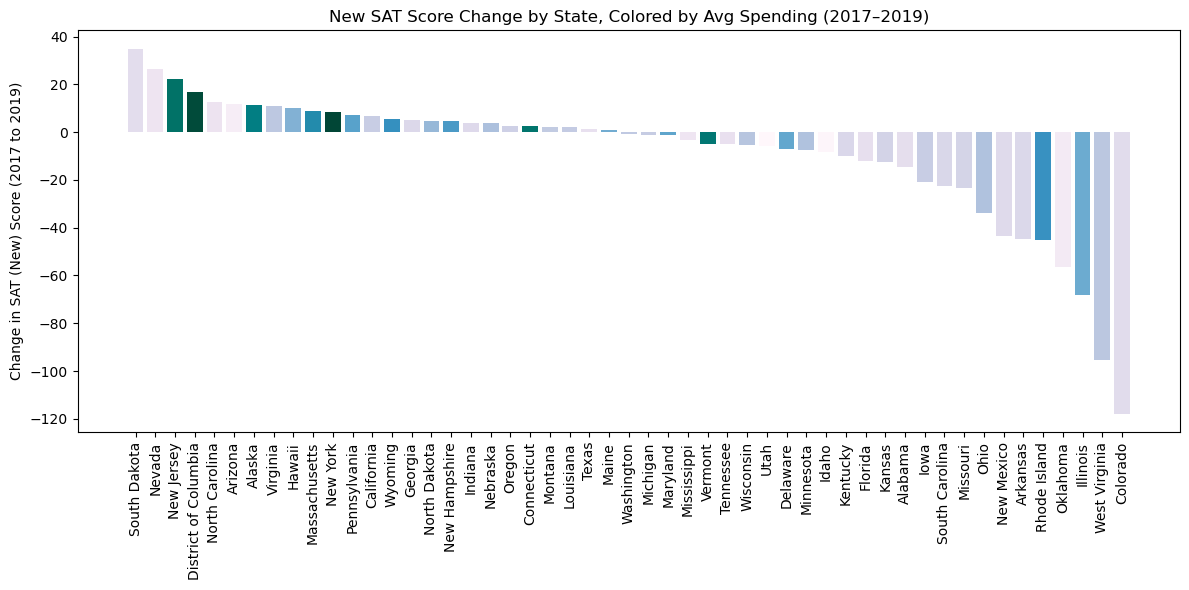

In [77]:
SATn_cleaned = SATn.groupby(['State', 'Year'], as_index=False)['Score'].mean()
SATn_pivot = SATn_cleaned.pivot(index='State', columns='Year', values='Score')

first_year = SATn_pivot.columns.min()
last_year = SATn_pivot.columns.max()
SATn_pivot['Score Change'] = SATn_pivot[last_year] - SATn_pivot[first_year]

satn_diff_sorted = SATn_pivot[['Score Change']].sort_values('Score Change', ascending=False)

satn_colors = [state_colors.get(state, 'black') for state in satn_diff_sorted.index]

plt.figure(figsize=(12, 6))
plt.bar(satn_diff_sorted.index, satn_diff_sorted['Score Change'], color=satn_colors)
plt.xticks(rotation=90)
plt.ylabel(f'Change in SAT (New) Score ({first_year} to {last_year})')
plt.title(f'New SAT Score Change by State, Colored by Avg Spending (2017–2019)')
plt.tight_layout()
plt.show()


# The relationship between spending and ACT / SAT scores also shows little obvious relationship between spending and the overall change in scoring.

#### Let's do some checking to see just how strong that relationship is!

## ACT scores:

In [71]:
year_cols = [col for col in spending.columns if str(col).isdigit()]
spending_reset = spending.reset_index()

spending_clean = spending_reset[['State'] + year_cols]

spending_long = spending_clean.melt(id_vars='State', var_name='Year', value_name='Spending')
spending_long['Year'] = spending_long['Year'].astype(int)

In [72]:
act_merged = pd.merge(ACT, spending_long, on=['State', 'Year'], how='inner')

In [73]:
act_clean = act_merged.dropna(subset=['Score', 'Spending'])

X = act_clean[['Spending']]
y = act_clean['Score']

# Sklearn regression
lr = LinearRegression()
lr.fit(X, y)
print(f"ACT Score = {lr.coef_[0]:.4f} * Spending + {lr.intercept_:.4f}")
print(f"R^2: {lr.score(X, y):.4f}")

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

ACT Score = 0.0002 * Spending + 18.1713
R^2: 0.3052
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     783.1
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          3.67e-143
Time:                        15:01:44   Log-Likelihood:                -3181.0
No. Observations:                1785   AIC:                             6366.
Df Residuals:                    1783   BIC:                             6377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


##### Spending Coefficient (0.0002):  There is statistical significance, but the effect is not large.  Every dollar increase in spending increases , ACT scores by 0.0002 points.

##### And with an r squared value of 0.3052, that means that about 70% of whatever drives the change in score comes from somewhere else.

## Old SAT scores

In [74]:
sato_merged = pd.merge(SATo, spending_long, on=['State', 'Year'], how='inner')
sato_clean = sato_merged.dropna(subset=['Score', 'Spending'])

X = sato_clean[['Spending']]
y = sato_clean['Score']

lr = LinearRegression()
lr.fit(X, y)
print(f"SATo Score = {lr.coef_[0]:.4f} * Spending + {lr.intercept_:.4f}")
print(f"R^2: {lr.score(X, y):.4f}")

SATo Score = -0.0041 * Spending + 856.5526
R^2: 0.0016


In [75]:
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.291
Date:                Mon, 16 Jun 2025   Prob (F-statistic):              0.256
Time:                        15:01:44   Log-Likelihood:                -6170.8
No. Observations:                 816   AIC:                         1.235e+04
Df Residuals:                     814   BIC:                         1.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        856.5526     56.753     15.093      0.0

##### The spending coefficient (-0.0004) shows there is no evidence of a relationship between the spending and the SAT score, as it used to be measured.  The fact that it is negative suggests there could be more of an inverse relationship, but the high p-value means that isn't reliable.

###### The almost-zero r squared value of 0.002 means that there is almost no evidence of a relationship at all.

## New SAT scores

In [76]:
satn_merged = pd.merge(SATn, spending_long, on=['State', 'Year'], how='inner')
satn_clean = satn_merged.dropna(subset=['Score', 'Spending'])

X = satn_clean[['Spending']]
y = satn_clean['Score']

lr.fit(X, y)
print(f"SATn Score = {lr.coef_[0]:.4f} * Spending + {lr.intercept_:.4f}")
print(f"R^2: {lr.score(X, y):.4f}")

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

SATn Score = -0.0040 * Spending + 813.6533
R^2: 0.0048
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.467
Date:                Mon, 16 Jun 2025   Prob (F-statistic):              0.227
Time:                        15:01:44   Log-Likelihood:                -2150.2
No. Observations:                 306   AIC:                             4304.
Df Residuals:                     304   BIC:                             4312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

##### Once again, we see a negative, though close to zero, coefficient of -0.004, suggesting that increases in spending result in decreases in score.  The p value for spending is 0.227, so the relationship is not statistically significant (over .05)

###### WIth an r squared value of 0.005, almost none of the variability in the score is related to spending at all.

# Final conclusion:

## Spending does not have any kind of a positive association with academic performance.